#Import Libraries and Load Dataset

In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import researchpy
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Use Raw Dataset

In [ ]:
url1 = '/content/drive/MyDrive/Research/COVID-19 News Sentiment/Dataset/raw-NA.csv'
url2 = '/content/drive/MyDrive/Research/COVID-19 News Sentiment/Dataset/raw-AuAs.csv'
url3 = '/content/drive/MyDrive/Research/COVID-19 News Sentiment/Dataset/raw-EU.csv'
url4 = '/content/drive/MyDrive/Research/COVID-19 News Sentiment/Dataset/raw-CA.csv'
dfNA = pd.read_csv(url1)
dfAuAs = pd.read_csv(url2)
dfEU = pd.read_csv(url3)
dfCA = pd.read_csv(url4)
df = pd.concat([dfNA,dfAuAs,dfEU,dfCA])
df.shape

###Label Media country & region

In [ ]:
df['region'] = "Other"
df.loc[df['Page Admin Top Country'] == 'CN', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'ID', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'IN', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'KH', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'LK', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'BD', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'MM', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'NP', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'PH', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'PK', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'SG', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'TH', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'AU', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'CA', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'GB', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'IM', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'IE', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'US', 'region'] = 'West'
df = df.drop(df[(df.region == 'Other')].index)
df['region'].describe()

count     987149
unique         2
top         West
freq      625628
Name: region, dtype: object

In [ ]:
df['country'] = "Other"
df.loc[df['Page Admin Top Country'] == 'CN', 'country'] = 'China'
df.loc[df['Page Admin Top Country'] == 'ID', 'country'] = 'Indonesia'
df.loc[df['Page Admin Top Country'] == 'IN', 'country'] = 'India'
df.loc[df['Page Admin Top Country'] == 'KH', 'country'] = 'Cambodia'
df.loc[df['Page Admin Top Country'] == 'LK', 'country'] = 'Sri Lanka'
df.loc[df['Page Admin Top Country'] == 'BD', 'country'] = 'Bangladesh'
df.loc[df['Page Admin Top Country'] == 'MM', 'country'] = 'Myanmar'
df.loc[df['Page Admin Top Country'] == 'NP', 'country'] = 'Nepal'
df.loc[df['Page Admin Top Country'] == 'PH', 'country'] = 'Philippines'
df.loc[df['Page Admin Top Country'] == 'PK', 'country'] = 'Pakistan'
df.loc[df['Page Admin Top Country'] == 'SG', 'country'] = 'Singapore'
df.loc[df['Page Admin Top Country'] == 'TH', 'country'] = 'Thailand'
df.loc[df['Page Admin Top Country'] == 'AU', 'country'] = 'Australia'
df.loc[df['Page Admin Top Country'] == 'CA', 'country'] = 'Canada'
df.loc[df['Page Admin Top Country'] == 'GB', 'country'] = 'United Kingdom'
df.loc[df['Page Admin Top Country'] == 'IM', 'country'] = 'Isle of Man'
df.loc[df['Page Admin Top Country'] == 'IE', 'country'] = 'Ireland'
df.loc[df['Page Admin Top Country'] == 'US', 'country'] = 'United States'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
params = {      
  'User Name': 'count',
  'Page Name': 'nunique'
}
dy = df.groupby(['region','country']).agg(params).reset_index()
dy

,region,country,User Name,Page Name
0,East,Bangladesh,92,4
1,East,Cambodia,367,2
2,East,China,2462,2
3,East,India,168365,50
4,East,Indonesia,153,2
5,East,Myanmar,3255,3
6,East,Nepal,2420,8
7,East,Pakistan,1343,8
8,East,Philippines,113990,20
9,East,Singapore,53872,15


In [ ]:
params = {      
  'Page Name': 'nunique'  
}
dy = df.groupby(['region']).agg(params).reset_index()
dy

,region,Page Name
0,East,125
1,West,524


In [ ]:
params = {      
  'Page Name': 'count'  
}
dy = df.groupby(['region']).agg(params).reset_index()
dy

,region,Page Name
0,East,361521
1,West,625628


###Cleanup Dataset

In [ ]:
df['specialreactions'] = df['Love'] + df['Wow'] + df['Haha'] + df['Sad'] + df['Angry'] + df['Care']
df['allreactions'] = df['specialreactions'] + df['Likes']
df = df.drop(df[(df.specialreactions < 2)].index)
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(528307, 45)

In [ ]:
df[['Likes','Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].describe().round(2)

,Likes,Love,Wow,Haha,Sad,Angry,Care
count,528307.00,528307.00,528307.00,528307.00,528307.00,528307.00,528307.00
mean,354.71,36.90,27.54,56.30,91.66,51.64,9.14
std,1563.51,329.41,181.61,381.06,852.85,423.93,134.51
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,1.00,1.00,0.00,0.00,0.00
50%,77.00,2.00,3.00,6.00,4.00,2.00,0.00
75%,221.00,7.00,12.00,26.00,26.00,11.00,2.00
max,149827.00,43629.00,29331.00,71273.00,180683.00,51491.00,28045.00


###Correlation Between Special Reactions

In [ ]:
# Number of post having each reaction
df['hasLikes'] = 1
df.loc[df['Likes'] == 0, 'hasLikes'] = 0
df['hasLove'] = 1
df.loc[df['Love'] == 0, 'hasLove'] = 0
df['hasWow'] = 1
df.loc[df['Wow'] == 0, 'hasWow'] = 0
df['hasHaha'] = 1
df.loc[df['Haha'] == 0, 'hasHaha'] = 0
df['hasSad'] = 1
df.loc[df['Sad'] == 0, 'hasSad'] = 0
df['hasAngry'] = 1
df.loc[df['Angry'] == 0, 'hasAngry'] = 0
df['hasCare'] = 1
df.loc[df['Care'] == 0, 'hasCare'] = 0

# % of Special Reactions
df['pLove'] = df['Love']/df['specialreactions']
df['pWow'] = df['Wow']/df['specialreactions']
df['pHaha'] = df['Haha']/df['specialreactions']
df['pSad'] = df['Sad']/df['specialreactions']
df['pAngry'] = df['Angry']/df['specialreactions']
df['pCare'] = df['Care']/df['specialreactions']

In [ ]:
dfhr = df[['hasLove', 'hasWow', 'hasHaha', 'hasSad', 'hasAngry', 'hasCare']]
dfhr.describe().round(2)

,hasLove,hasWow,hasHaha,hasSad,hasAngry,hasCare
count,528307.00,528307.00,528307.00,528307.00,528307.00,528307.00
mean,0.68,0.78,0.82,0.74,0.67,0.47
std,0.47,0.41,0.38,0.44,0.47,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,0.00,0.00,0.00
50%,1.00,1.00,1.00,1.00,1.00,0.00
75%,1.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
dfpr = df[['pLove', 'pWow', 'pHaha', 'pSad', 'pAngry', 'pCare']]
dfpr.describe().round(2)

,pLove,pWow,pHaha,pSad,pAngry,pCare
count,528307.00,528307.00,528307.00,528307.00,528307.00,528307.00
mean,0.16,0.12,0.29,0.25,0.13,0.04
std,0.27,0.16,0.30,0.31,0.21,0.09
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.01,0.02,0.00,0.00,0.00
50%,0.02,0.06,0.17,0.08,0.04,0.00
75%,0.20,0.17,0.53,0.50,0.16,0.03
max,1.00,1.00,1.00,1.00,1.00,1.00


,hasLove,hasWow,hasHaha,hasSad,hasAngry,hasCare
hasLove,1.000,0.104,0.079,-0.051,0.063,0.229
hasWow,0.104,1.000,0.189,0.313,0.273,0.190
hasHaha,0.079,0.189,1.000,0.088,0.298,0.134
hasSad,-0.051,0.313,0.088,1.000,0.301,0.183
hasAngry,0.063,0.273,0.298,0.301,1.000,0.148
hasCare,0.229,0.190,0.134,0.183,0.148,1.000


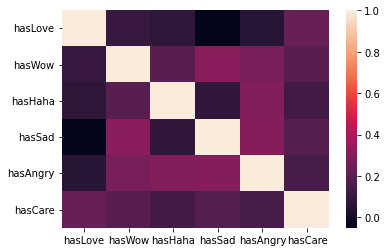

In [ ]:
sns.heatmap(dfhr.corr())
dfhr.corr().round(3)

,pLove,pWow,pHaha,pSad,pAngry,pCare
pLove,1.000,-0.157,-0.272,-0.391,-0.229,0.099
pWow,-0.157,1.000,-0.230,-0.036,-0.130,-0.089
pHaha,-0.272,-0.230,1.000,-0.484,-0.141,-0.168
pSad,-0.391,-0.036,-0.484,1.000,-0.230,-0.052
pAngry,-0.229,-0.130,-0.141,-0.230,1.000,-0.161
pCare,0.099,-0.089,-0.168,-0.052,-0.161,1.000


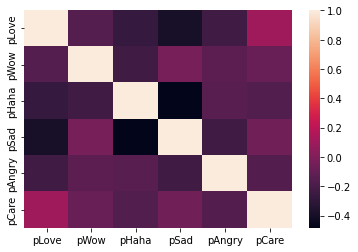

In [ ]:
sns.heatmap(dfpr.corr())
dfpr.corr().round(3)

###Calculate Score

In [ ]:
# Vader Sentiment Score Based on Text
df['txt'] = df[['Image Text', 'Link Text', 'Description', 'Message']].fillna('').agg(' '.join, axis=1)

analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['txt']]
df['vspos'] = [analyzer.polarity_scores(x)['pos'] for x in df['txt']]
df['vsneg'] = [analyzer.polarity_scores(x)['neg'] for x in df['txt']]
df['vsneu'] = [analyzer.polarity_scores(x)['neu'] for x in df['txt']]

In [ ]:
# Intensity = proportion of special reactions over all reactions
df['intensity'] = df['specialreactions']/df['allreactions']
df['intensity'].describe().round(3)

count    528307.000
mean          0.409
std           0.253
min           0.003
25%           0.190
50%           0.374
75%           0.615
max           1.000
Name: intensity, dtype: float64

In [ ]:
# Valence = -1 if love < sad + angry, and 1 if otherwise
df['valence2'] = 1
df.loc[df['Love'] < (df['Sad']+df['Angry']), 'valence'] = -1
df['valence2'].describe().round(3)

count    528307.000
mean         -0.342
std           0.940
min          -1.000
25%          -1.000
50%          -1.000
75%           1.000
max           1.000
Name: valence2, dtype: float64

In [ ]:
# Polarity = Intensity * Valence
df['polarity2'] = df['intensity']*df['valence']
df['polarity2'].describe().round(3)

count    528307.000
mean         -0.270
std           0.398
min          -1.000
25%          -0.601
50%          -0.326
75%           0.093
max           1.000
Name: polarity2, dtype: float64

###Categorize Data

In [ ]:
df['month'] = pd.DatetimeIndex(df['Post Created Date']).month
df["month"] = df.month.map("{:02}".format)
df['year'] = pd.DatetimeIndex(df['Post Created Date']).year.astype(str) + "-" + df['month']
df['year'].describe()

count      528307
unique         27
top       2020-04
freq        42622
Name: year, dtype: object

In [ ]:
df[['year','region']]

,year,region
0,2020-11,West
1,2020-10,West
2,2020-12,West
3,2020-12,West
4,2020-11,West
...,...,...
237198,2020-04,West
237206,2020-03,West
238075,2020-04,West
238095,2020-06,West


### Tone & Reactions Labels

In [ ]:
# Tone Label
df['tone'] = "neutral"
df.loc[df['compound'] > 0, 'tone'] = "positive"
df.loc[df['compound'] < 0, 'tone'] = "negative"

In [ ]:
ds = df.groupby(['region','tone'])['tone'].count()
dst = df.groupby(['region'])['tone'].count()
100*ds/dst

region  sentiment
East    negative     40.068864
        neutral      12.564898
        positive     47.366239
West    negative     43.610645
        neutral      11.870149
        positive     44.519206
Name: sentiment, dtype: float64

In [ ]:
# Reaction Label
df['reaction'] = "neutral"
df.loc[df['valence'] > 0, 'reaction'] = "positive"
df.loc[df['valence'] < 0, 'reaction'] = "negative"

In [ ]:
dr = df.groupby(['region','reaction'])['reaction'].count()
drt = df.groupby(['region'])['reaction'].count()
100*dr/drt

region  reaction
East    negative    76.745025
        positive    23.254975
West    negative    87.515578
        positive    12.484422
Name: reaction, dtype: float64

In [ ]:
dsr = df.groupby(['region','tone','reaction'])['reaction'].count()
dsrt = df.groupby(['region','tone'])['reaction'].count()
100*dsr/dsrt

region  sentiment  reaction
East    negative   negative    84.049429
                   positive    15.950571
        neutral    negative    74.921090
                   positive    25.078910
        positive   negative    71.049794
                   positive    28.950206
West    negative   negative    91.558265
                   positive     8.441735
        neutral    negative    89.403357
                   positive    10.596643
        positive   negative    83.052057
                   positive    16.947943
Name: reaction, dtype: float64

###Save as Processed Dataset

In [ ]:
df.to_csv('processed.csv', chunksize=1000)

In [ ]:
from google.colab import files
files.download("processed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Use Processed Dataset

In [ ]:
#Processed Dataset
url1 = '/content/drive/MyDrive/Research/COVID-19 News Sentiment/Dataset/processed.csv'
df = pd.read_csv(url1)
df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,4,5,10,11,12,13,14,23,25,30,31,32,33,34,35,36,38,39,40,41,42,43,59,69,70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(538722, 72)

In [ ]:
dfEast = df.drop(df[(df.region == 'West')].index)
dfWest = df.drop(df[(df.region == 'East')].index)

In [ ]:
dfppEast = df.loc[(df['sentiment'] == "positive") & (df['reaction'] == "positive") & (df['region'] == "East")]
dfpnEast = df.loc[(df['sentiment'] == "positive") & (df['reaction'] == "negative") & (df['region'] == "East")]
dfnpEast = df.loc[(df['sentiment'] == "negative") & (df['reaction'] == "positive") & (df['region'] == "East")]
dfnnEast = df.loc[(df['sentiment'] == "negative") & (df['reaction'] == "negative") & (df['region'] == "East")]

In [ ]:
dfppWest = df.loc[(df['sentiment'] == "positive") & (df['reaction'] == "positive") & (df['region'] == "West")]
dfpnWest = df.loc[(df['sentiment'] == "positive") & (df['reaction'] == "negative") & (df['region'] == "West")]
dfnpWest = df.loc[(df['sentiment'] == "negative") & (df['reaction'] == "positive") & (df['region'] == "West")]
dfnnWest = df.loc[(df['sentiment'] == "negative") & (df['reaction'] == "negative") & (df['region'] == "West")]

In [ ]:
dp = df[df['txt'].str.contains('pandemic|Pandemic', na=False)]
dp.shape

(85989, 72)

In [ ]:
dc = df[df['txt'].str.contains('case|Case', na=False)]
dc.shape

(122881, 72)

In [ ]:
dv = df[df['txt'].str.contains('vaccine|Vaccine', na=False)]
dv.shape

(85910, 72)

In [ ]:
dh = df[df['txt'].str.contains('health|Health', na=False)]
dh.shape

(105630, 72)

In [ ]:
dd = df[df['txt'].str.contains('death|Death', na=False)]
dd.shape

(49725, 72)

In [ ]:
dpEast = dfEast[dfEast['txt'].str.contains('pandemic|Pandemic', na=False)]
dpWest = dfWest[dfWest['txt'].str.contains('pandemic|Pandemic', na=False)]

In [ ]:
dcEast = dfEast[dfEast['txt'].str.contains('case|Case', na=False)]
dcWest = dfWest[dfWest['txt'].str.contains('case|Case', na=False)]

In [ ]:
dvEast = dfEast[dfEast['txt'].str.contains('vaccine|Vaccine', na=False)]
dvWest = dfWest[dfWest['txt'].str.contains('vaccine|Vaccine', na=False)]

In [ ]:
dhEast = dfEast[dfEast['txt'].str.contains('health|Health', na=False)]
dhWest = dfWest[dfWest['txt'].str.contains('health|Health', na=False)]

In [ ]:
ddEast = dfEast[dfEast['txt'].str.contains('death|Death', na=False)]
ddWest = dfWest[dfWest['txt'].str.contains('death|Death', na=False)]

In [ ]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dt = df.groupby(['month','region']).agg(params).reset_index()

In [ ]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dtp = dp.groupby(['month','region']).agg(params).reset_index()

In [ ]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dtc = dc.groupby(['month','region']).agg(params).reset_index()

In [ ]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dtv = dv.groupby(['month','region']).agg(params).reset_index()

In [ ]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dth = dh.groupby(['month','region']).agg(params).reset_index()

In [ ]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dtd = dd.groupby(['month','region']).agg(params).reset_index()

In [ ]:
dtEast = dt.drop(dt[(dt.region == 'West')].index)
dtWest = dt.drop(dt[(dt.region == 'East')].index)

In [ ]:
dtpEast = dtp.drop(dtp[(dtp.region == 'West')].index)
dtpWest = dtp.drop(dtp[(dtp.region == 'East')].index)

In [ ]:
dtcEast = dtc.drop(dtc[(dtc.region == 'West')].index)
dtcWest = dtc.drop(dtc[(dtc.region == 'East')].index)

In [ ]:
dtvEast = dtv.drop(dtv[(dtv.region == 'West')].index)
dtvWest = dtv.drop(dtv[(dtv.region == 'East')].index)

In [ ]:
dthEast = dth.drop(dth[(dth.region == 'West')].index)
dthWest = dth.drop(dth[(dth.region == 'East')].index)

In [ ]:
dtdEast = dtd.drop(dtd[(dtd.region == 'West')].index)
dtdWest = dtd.drop(dtd[(dtd.region == 'East')].index)

In [ ]:
dp['Post Created Date'].min()

'2020-02-15'

In [ ]:
dp['Post Created Date'].max()

'2022-04-14'

#Cross-Sectional

##WordCloud

In [ ]:
wcstopwords = set(STOPWORDS)
more_stopwords = {'covid','covid-19','coronavirus', 'https', 'india','philippine','philippines','singapore','china','canada','america','canadian','american','manila','ontario','ottawa','said','will'}
wcstopwords = wcstopwords.union(more_stopwords)

####All

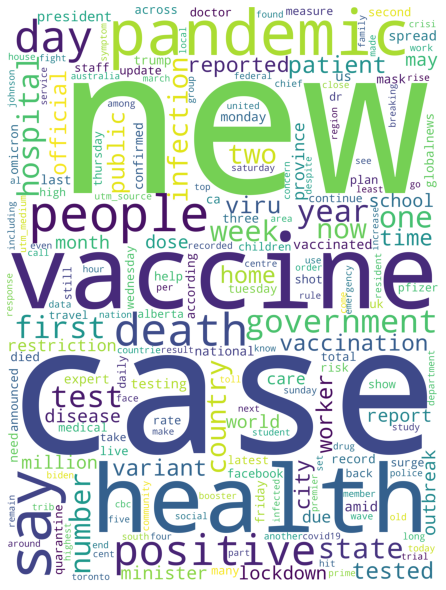

In [ ]:
#Wordcloud for all data
words = ''

for val in df.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=3000, height=4000, 
               stopwords=wcstopwords).generate(words)



plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

####East

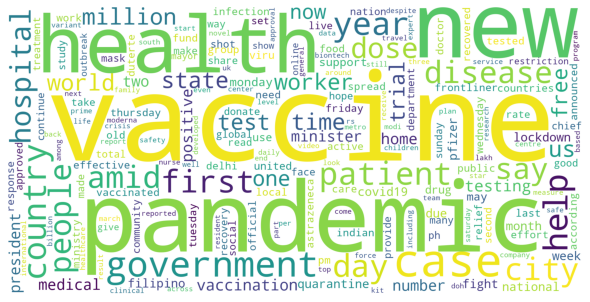

In [ ]:
#Wordcloud for positive sentiment - positive reactions
words = ''

for val in dfppEast.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)



plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

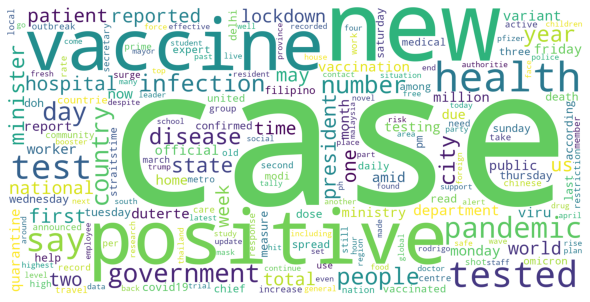

In [ ]:
#Wordcloud for the positive sentiment - negative reaction
words = ''

for val in dfpnEast.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

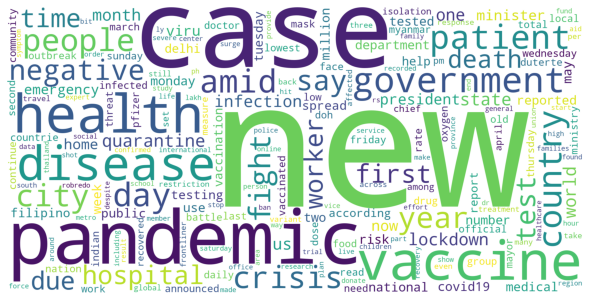

In [ ]:
#Wordcloud for the negative sentiment - positive reaction
words = ''

for val in dfnpEast.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

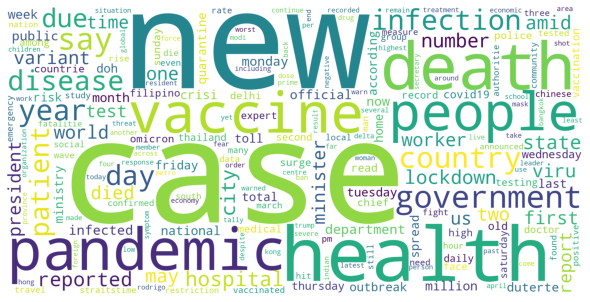

In [ ]:
#Wordcloud for the negative sentiment and negative reaction
words = ''

for val in dfnnEast.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

####West

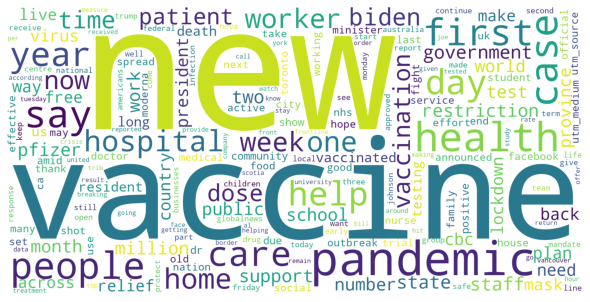

In [ ]:
#Wordcloud for the positive sentiment - positive reaction
words = ''

for val in dfppWest.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)



plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

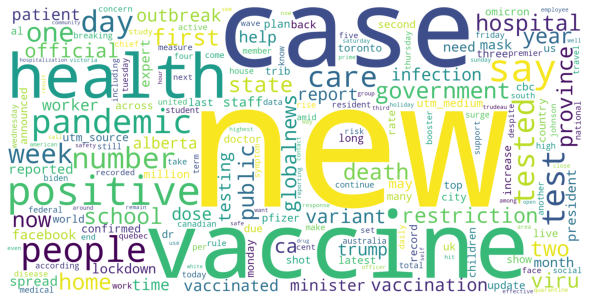

In [ ]:
#Wordcloud for the positive sentiment - negative reaction
words = ''

for val in dfpnWest.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

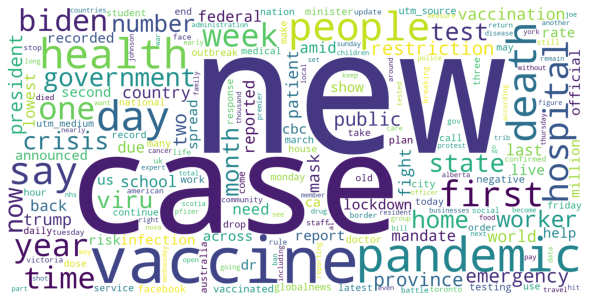

In [ ]:
#Wordcloud for the negative sentiment - positive reaction
words = ''

for val in dfnpWest.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

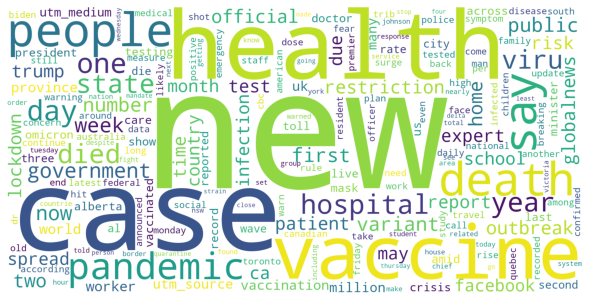

In [ ]:
#Wordcloud for the negative sentiment and negative reaction
words = ''

for val in dfnnWest.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##Welch's T-Test

####News Tone

In [ ]:
# All Dataset
researchpy.ttest(dfEast['compound'], dfWest['compound'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  compound  166415.0  0.037690  0.603181  0.001479   0.034792  0.040588
 1  compound  361891.0 -0.008490  0.581486  0.000967  -0.010385 -0.006596
 2  combined  528306.0  0.006056  0.588796  0.000810   0.004469  0.007644,
                         Welch's t-test      results
 0  Difference (compound - compound) =        0.0462
 1                Degrees of freedom =   312778.7718
 2                                 t =       26.1419
 3             Two side test p value =        0.0000
 4            Difference < 0 p value =        1.0000
 5            Difference > 0 p value =        0.0000
 6                         Cohen's d =        0.0785
 7                         Hedge's g =        0.0785
 8                     Glass's delta =        0.0766
 9                       Pearson's r =        0.0467)

In [ ]:
# 'Pandemic' subset
researchpy.ttest(dpEast['compound'], dpWest['compound'],equal_variances= False)

(   Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  compound  26870.0  0.021126  0.632761  0.003860   0.013560  0.028692
 1  compound  59119.0 -0.057523  0.610301  0.002510  -0.062443 -0.052603
 2  combined  85989.0 -0.032947  0.618479  0.002109  -0.037081 -0.028813,
                         Welch's t-test     results
 0  Difference (compound - compound) =       0.0786
 1                Degrees of freedom =   50307.7548
 2                                 t =      17.0810
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       1.0000
 5            Difference > 0 p value =       0.0000
 6                         Cohen's d =       0.1274
 7                         Hedge's g =       0.1274
 8                     Glass's delta =       0.1243
 9                       Pearson's r =       0.0759)

In [ ]:
# 'Case' subset
researchpy.ttest(dcEast['compound'], dcWest['compound'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  compound   40482.0 -0.013965  0.543883  0.002703  -0.019263 -0.008666
 1  compound   82399.0  0.013976  0.514826  0.001793   0.010461  0.017492
 2  combined  122881.0  0.004772  0.524739  0.001497   0.001838  0.007705,
                         Welch's t-test     results
 0  Difference (compound - compound) =      -0.0279
 1                Degrees of freedom =   76667.7655
 2                                 t =      -8.6130
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       0.0000
 5            Difference > 0 p value =       1.0000
 6                         Cohen's d =      -0.0533
 7                         Hedge's g =      -0.0533
 8                     Glass's delta =      -0.0514
 9                       Pearson's r =       0.0311)

In [ ]:
# 'Vaccine' subset
researchpy.ttest(dvEast['compound'], dvWest['compound'],equal_variances= False)

(   Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  compound  24538.0  0.158036  0.550949  0.003517   0.151142  0.164929
 1  compound  61372.0  0.093416  0.550871  0.002224   0.089058  0.097775
 2  combined  85910.0  0.111873  0.551663  0.001882   0.108184  0.115562,
                         Welch's t-test     results
 0  Difference (compound - compound) =       0.0646
 1                Degrees of freedom =   45187.8453
 2                                 t =      15.5292
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       1.0000
 5            Difference > 0 p value =       0.0000
 6                         Cohen's d =       0.1173
 7                         Hedge's g =       0.1173
 8                     Glass's delta =       0.1173
 9                       Pearson's r =       0.0729)

In [ ]:
# 'Health' subset
researchpy.ttest(dhEast['compound'], dhWest['compound'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  compound   34355.0 -0.013649  0.588905  0.003177  -0.019877 -0.007422
 1  compound   71275.0  0.003939  0.572836  0.002146  -0.000266  0.008145
 2  combined  105630.0 -0.001781  0.578167  0.001779  -0.005268  0.001706,
                         Welch's t-test     results
 0  Difference (compound - compound) =      -0.0176
 1                Degrees of freedom =   66199.5900
 2                                 t =      -4.5876
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       0.0000
 5            Difference > 0 p value =       1.0000
 6                         Cohen's d =      -0.0304
 7                         Hedge's g =      -0.0304
 8                     Glass's delta =      -0.0299
 9                       Pearson's r =       0.0178)

In [ ]:
# 'Death' subset
researchpy.ttest(ddEast['compound'], ddWest['compound'],equal_variances= False)

(   Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  compound  11854.0 -0.380943  0.554599  0.005094  -0.390928 -0.370959
 1  compound  37871.0 -0.275173  0.553344  0.002843  -0.280746 -0.269599
 2  combined  49725.0 -0.300387  0.555469  0.002491  -0.305270 -0.295505,
                         Welch's t-test     results
 0  Difference (compound - compound) =      -0.1058
 1                Degrees of freedom =   19790.3869
 2                                 t =     -18.1309
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       0.0000
 5            Difference > 0 p value =       1.0000
 6                         Cohen's d =      -0.1910
 7                         Hedge's g =      -0.1910
 8                     Glass's delta =      -0.1907
 9                       Pearson's r =       0.1278)

####Public Reactions

In [ ]:
researchpy.ttest(dfEast['polarity'], dfWest['polarity'],equal_variances= False)

(    Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  polarity2  166415.0 -0.120773  0.329905  0.000809  -0.122358 -0.119188
 1  polarity2  361891.0 -0.338382  0.407331  0.000677  -0.339709 -0.337055
 2   combined  528306.0 -0.269836  0.397688  0.000547  -0.270908 -0.268763,
                           Welch's t-test      results
 0  Difference (polarity2 - polarity2) =        0.2176
 1                  Degrees of freedom =   392760.6638
 2                                   t =      206.3143
 3               Two side test p value =        0.0000
 4              Difference < 0 p value =        1.0000
 5              Difference > 0 p value =        0.0000
 6                           Cohen's d =        0.5658
 7                           Hedge's g =        0.5658
 8                       Glass's delta =        0.6596
 9                         Pearson's r =        0.3127)

In [ ]:
# 'Pandemic' subset
researchpy.ttest(dpEast['polarity'], dpWest['polarity'],equal_variances= False)

(    Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  polarity2  26870.0 -0.063369  0.335345  0.002046  -0.067378 -0.059359
 1  polarity2  59119.0 -0.288165  0.404615  0.001664  -0.291427 -0.284903
 2   combined  85989.0 -0.217920  0.398186  0.001358  -0.220582 -0.215259,
                           Welch's t-test     results
 0  Difference (polarity2 - polarity2) =       0.2248
 1                  Degrees of freedom =   61879.0779
 2                                   t =      85.2430
 3               Two side test p value =       0.0000
 4              Difference < 0 p value =       1.0000
 5              Difference > 0 p value =       0.0000
 6                           Cohen's d =       0.5849
 7                           Hedge's g =       0.5849
 8                       Glass's delta =       0.6703
 9                         Pearson's r =       0.3242)

In [ ]:
# 'Case' subset
researchpy.ttest(dcEast['polarity'], dcWest['polarity'],equal_variances= False)

(    Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  polarity2   40482.0 -0.217321  0.280824  0.001396  -0.220056 -0.214585
 1  polarity2   82399.0 -0.463972  0.354385  0.001235  -0.466392 -0.461552
 2   combined  122881.0 -0.382715  0.351616  0.001003  -0.384681 -0.380749,
                           Welch's t-test     results
 0  Difference (polarity2 - polarity2) =       0.2467
 1                  Degrees of freedom =   98872.9727
 2                                   t =     132.3668
 3               Two side test p value =       0.0000
 4              Difference < 0 p value =       1.0000
 5              Difference > 0 p value =       0.0000
 6                           Cohen's d =       0.7430
 7                           Hedge's g =       0.7430
 8                       Glass's delta =       0.8783
 9                         Pearson's r =       0.3880)

In [ ]:
# 'Vaccine' subset
researchpy.ttest(dvEast['polarity'], dvWest['polarity'],equal_variances= False)

(    Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  polarity2  24538.0 -0.028268  0.342920  0.002189  -0.032559 -0.023977
 1  polarity2  61372.0 -0.225910  0.407137  0.001643  -0.229131 -0.222689
 2   combined  85910.0 -0.169459  0.399965  0.001365  -0.172133 -0.166784,
                           Welch's t-test     results
 0  Difference (polarity2 - polarity2) =       0.1976
 1                  Degrees of freedom =   53230.8054
 2                                   t =      72.2014
 3               Two side test p value =       0.0000
 4              Difference < 0 p value =       1.0000
 5              Difference > 0 p value =       0.0000
 6                           Cohen's d =       0.5069
 7                           Hedge's g =       0.5069
 8                       Glass's delta =       0.5764
 9                         Pearson's r =       0.2987)

In [ ]:
# 'Health' subset
researchpy.ttest(dhEast['polarity'], dhWest['polarity'],equal_variances= False)

(    Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  polarity2   34355.0 -0.169769  0.323967  0.001748  -0.173195 -0.166343
 1  polarity2   71275.0 -0.377520  0.395674  0.001482  -0.380425 -0.374615
 2   combined  105630.0 -0.309951  0.386323  0.001189  -0.312281 -0.307622,
                           Welch's t-test     results
 0  Difference (polarity2 - polarity2) =       0.2078
 1                  Degrees of freedom =   81267.5155
 2                                   t =      90.6568
 3               Two side test p value =       0.0000
 4              Difference < 0 p value =       1.0000
 5              Difference > 0 p value =       0.0000
 6                           Cohen's d =       0.5557
 7                           Hedge's g =       0.5557
 8                       Glass's delta =       0.6413
 9                         Pearson's r =       0.3031)

In [ ]:
# 'Death' subset
researchpy.ttest(ddEast['polarity'], ddWest['polarity'],equal_variances= False)

(    Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  polarity2  11854.0 -0.257019  0.266052  0.002444  -0.261809 -0.252229
 1  polarity2  37871.0 -0.528163  0.346747  0.001782  -0.531655 -0.524670
 2   combined  49725.0 -0.463524  0.348987  0.001565  -0.466592 -0.460457,
                           Welch's t-test     results
 0  Difference (polarity2 - polarity2) =       0.2711
 1                  Degrees of freedom =   25549.3523
 2                                   t =      89.6565
 3               Two side test p value =       0.0000
 4              Difference < 0 p value =       1.0000
 5              Difference > 0 p value =       0.0000
 6                           Cohen's d =       0.8234
 7                           Hedge's g =       0.8234
 8                       Glass's delta =       1.0191
 9                         Pearson's r =       0.4892)

In [ ]:
researchpy.corr_pair(dfWest[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.1621,0.0000,361891


In [ ]:
researchpy.corr_pair(dfEast[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.1605,0.0000,166415


In [ ]:
researchpy.corr_pair(dtEast[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.6351,0.0004,27


In [ ]:
researchpy.corr_pair(ddEast[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.1745,0.0000,11854


#Aggregated by month

In [ ]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dd = df.groupby(['Post Created Date','month','region']).agg(params).reset_index()
dd

,Post Created Date,year,region,compound,polarity2
0,2020-02-11,2020-02,East,0.301225,-0.289806
1,2020-02-11,2020-02,West,-0.299500,-0.295476
2,2020-02-12,2020-02,East,-0.138808,-0.178959
3,2020-02-12,2020-02,West,-0.174845,-0.377873
4,2020-02-13,2020-02,East,-0.041756,-0.209342
...,...,...,...,...,...
1577,2022-04-12,2022-04,West,-0.034493,-0.349883
1578,2022-04-13,2022-04,East,0.168155,-0.082014
1579,2022-04-13,2022-04,West,-0.021263,-0.356727
1580,2022-04-14,2022-04,East,0.062913,-0.126506


In [ ]:
ddEast = dd.drop(dd[(dd.region == 'West')].index)
ddWest = dd.drop(dd[(dd.region == 'East')].index)

##Line Charts

####All Dataset

In [ ]:
fig = px.line(dt, 
              x='month', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 2000,
              height = 2000,             
              labels={"year": ""})

fig.update_traces(line=dict(width=10))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
newlegends = {"compound": "News Tone", "polarity2": "Public Reaction"}
fig.for_each_trace(lambda t: t.update(name = newlegends[t.name],
                                      legendgroup = newlegends[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newlegends[t.name])
                                     ))
fig.update_layout(title_font_size=48, legend_title="Legend",yaxis_title="Score",font_size=36)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.98,
    xanchor="left",
    x=0.02
))
fig.update_xaxes(tickangle=-75)
fig.update_yaxes(range=(-1,1))
fig.show()

####Case Subset

In [ ]:
fig = px.line(dtc, 
              x='month', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 1000,
              height = 450,
              title="Subset: Case",              
              labels={"year": ""})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_traces(line=dict(width=5))
fig.update_layout(title_font_size=36, showlegend=False ,yaxis_title="Score",font_size=24)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(range=(-1,1))
fig.show()

####Vaccine Subset

In [ ]:
fig = px.line(dtv, 
              x='month', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 1000,
              height = 450,
              title="Subset: Vaccine",              
              labels={"year": ""})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_traces(line=dict(width=5))
fig.update_layout(title_font_size=36, showlegend=False ,yaxis_title="Score",font_size=24)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(range=(-1,1))
fig.show()

####Health Subset

In [ ]:
fig = px.line(dth, 
              x='month', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 1000,
              height = 450,
              title="Subset: Health",              
              labels={"year": ""})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_traces(line=dict(width=5))
fig.update_layout(title_font_size=36, showlegend=False ,yaxis_title="Score",font_size=24)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(range=(-1,1))
fig.show()

####Death Subset

In [ ]:
fig = px.line(dtd, 
              x='month', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 1000,
              height = 450,
              title="Subset: Death",              
              labels={"year": ""})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_traces(line=dict(width=5))
fig.update_layout(title_font_size=36, showlegend=False ,yaxis_title="Score",font_size=24)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(range=(-1,1))
fig.show()

## Tone & Reactions Correlation

###All Dataset

In [ ]:
researchpy.corr_pair(dtWest[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.2272,0.2544,27


In [ ]:
researchpy.corr_pair(dtEast[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.6351,0.0004,27


###Case Subset

In [ ]:
researchpy.corr_pair(dtcWest[['compound','polarity']])

,r value,p-value,N
compound & polarity2,-0.4030,0.0372,27


In [ ]:
researchpy.corr_pair(dtcEast[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.2659,0.1800,27


###Vaccine Subset

In [ ]:
researchpy.corr_pair(dtvWest[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.4610,0.0155,27


In [ ]:
researchpy.corr_pair(dtvEast[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.5608,0.0023,27


###Health Subset

In [ ]:
researchpy.corr_pair(dthWest[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.0251,0.9012,27


In [ ]:
researchpy.corr_pair(dthEast[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.3786,0.0515,27


###Death Subset

In [ ]:
researchpy.corr_pair(dtdWest[['compound','polarity']])

,r value,p-value,N
compound & polarity2,-0.1148,0.5686,27


In [ ]:
researchpy.corr_pair(dtdEast[['compound','polarity']])

,r value,p-value,N
compound & polarity2,0.5974,0.0010,27
